<a href="https://colab.research.google.com/github/siddharth0517/Handwritten-Digit-Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

**Importing Dataset**

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


**Demonstrating Dataset**

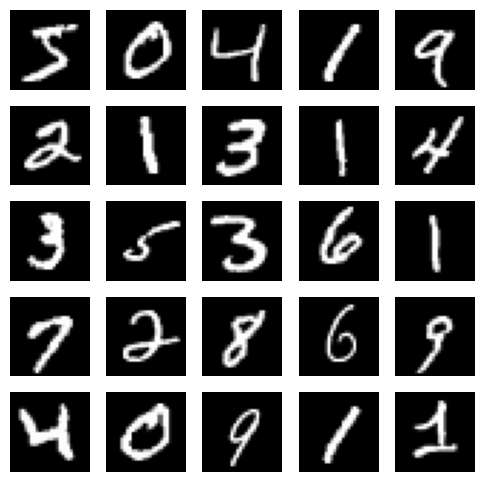

In [4]:
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


# Data Preprocessing

**Converting Image From 2D into 3D**

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**Normalize Dataset**

In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

**One Hot Encoding Dependent variable**

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Building CNN Model

In [9]:
cnn = tf.keras.models.Sequential()

*Adding Convolutional Layer*

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*Max Pooling*

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Adding Another Layer*

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

*Flattening*

In [13]:
cnn.add(tf.keras.layers.Flatten())

*Output Layer*

In [14]:
from tensorflow.keras.regularizers import l2
cnn.add(tf.keras.layers.Dense(units=128, kernel_regularizer=l2(0.001),activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compiling and Training

**Compiling**

In [15]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

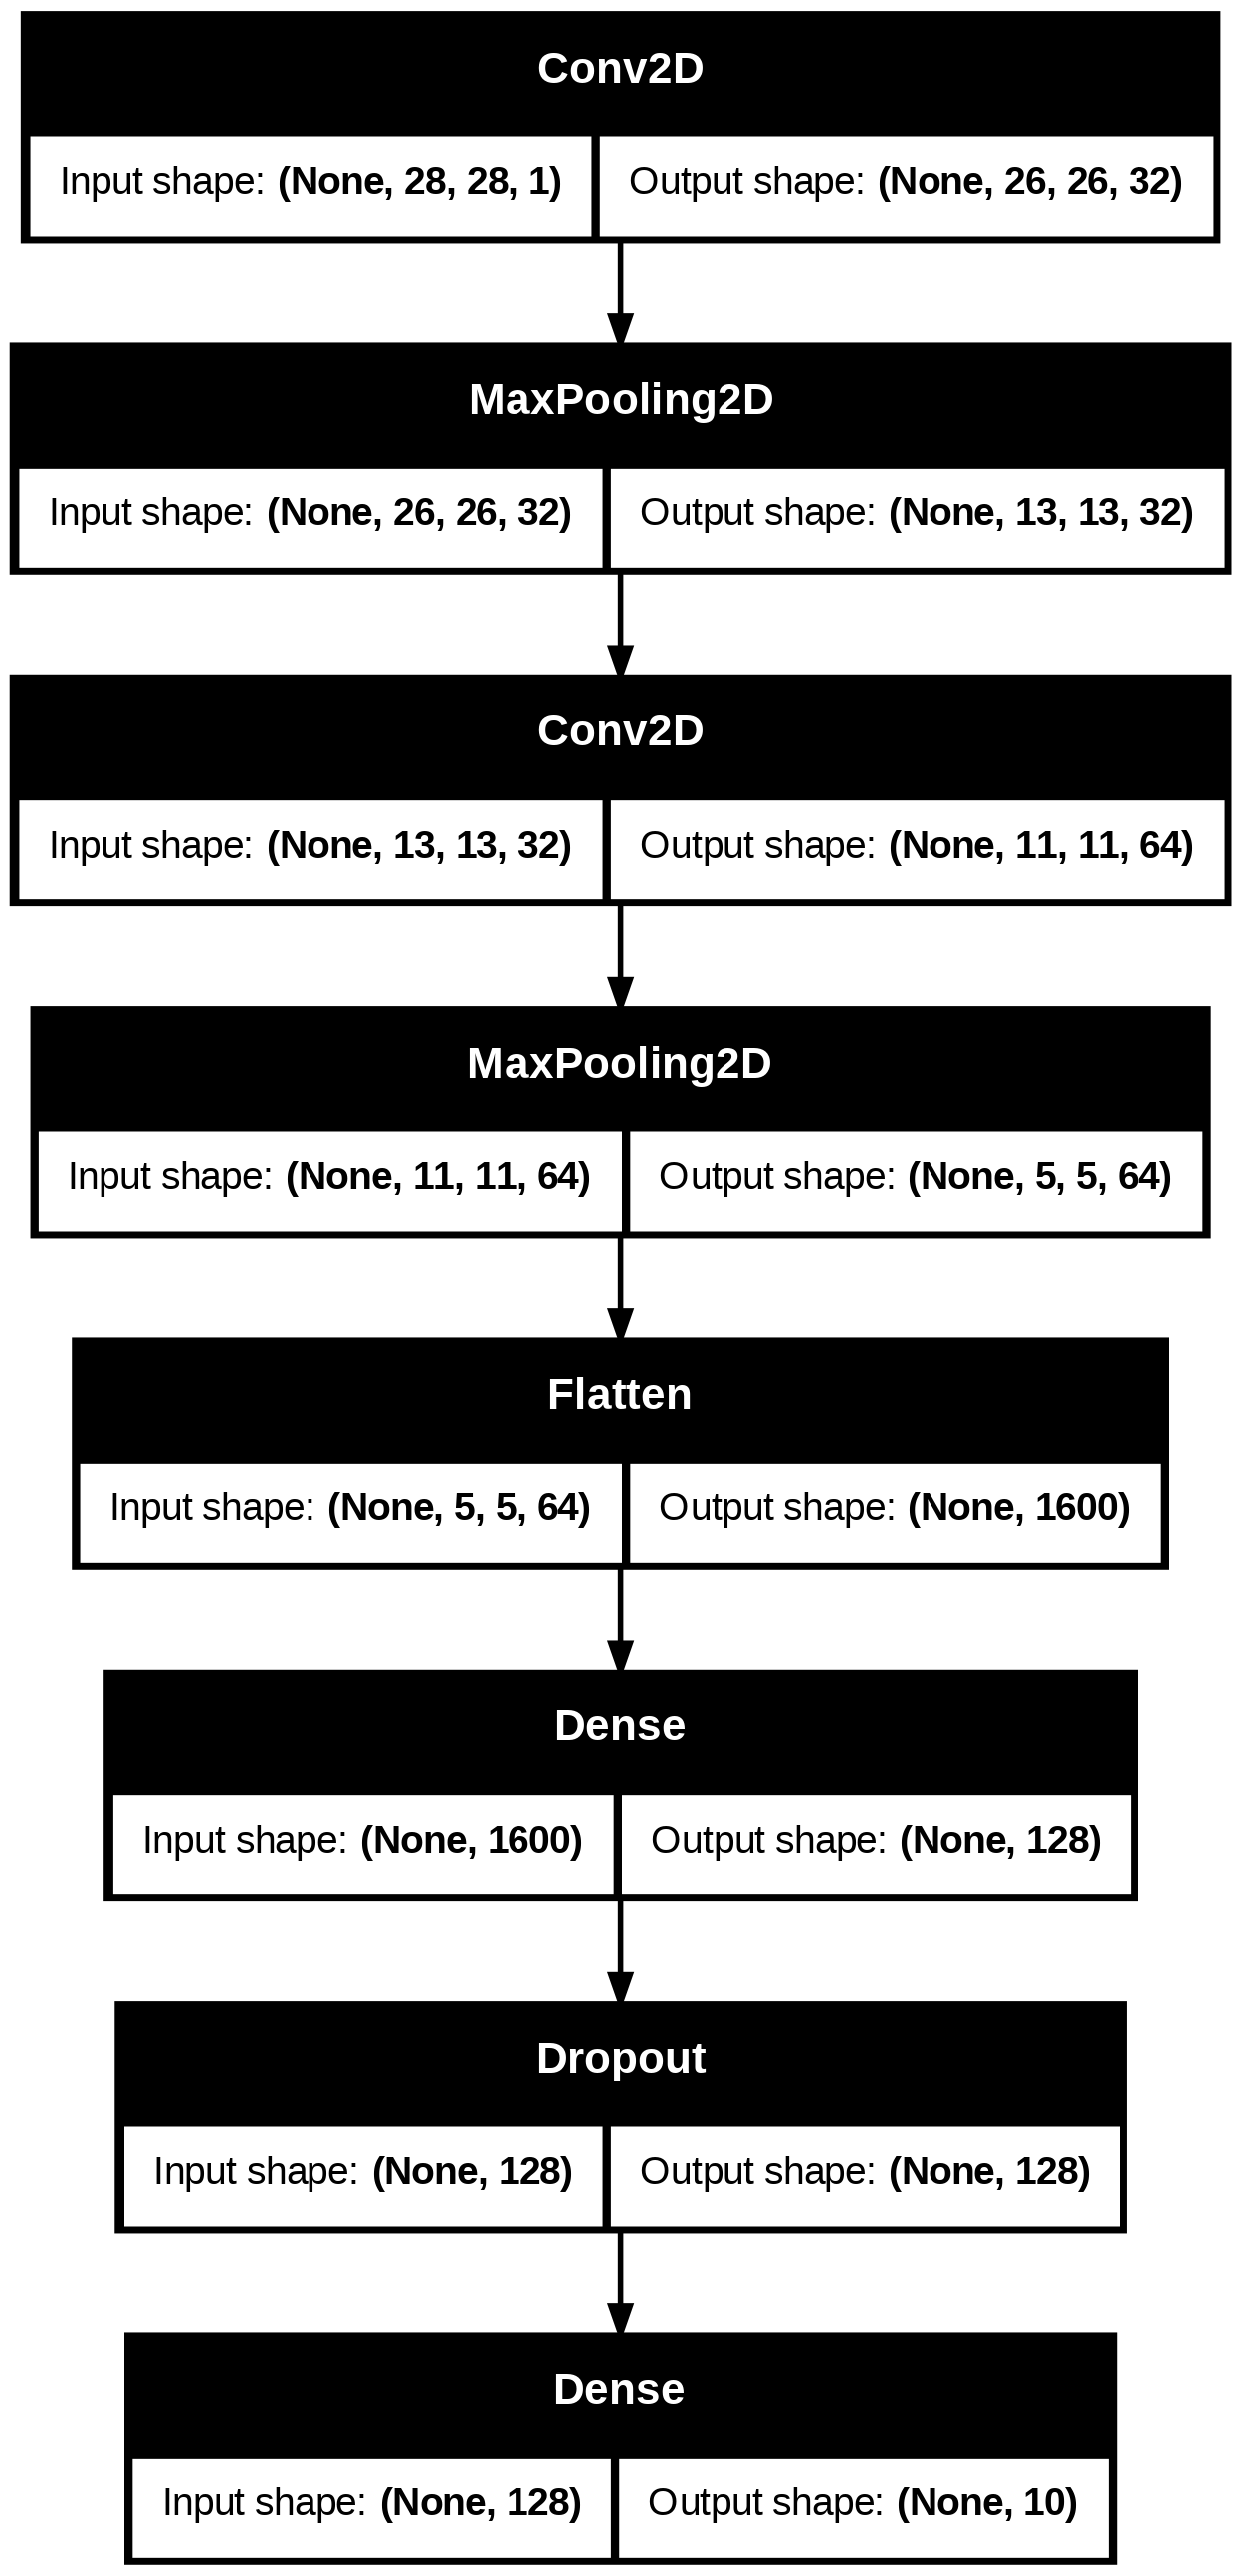

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,to_file='mlp.mnist.png',show_shapes=True)

**Training**

In [17]:
history = cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.8398 - loss: 0.6473 - val_accuracy: 0.9819 - val_loss: 0.1393
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9691 - loss: 0.1818 - val_accuracy: 0.9843 - val_loss: 0.1135
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.9745 - loss: 0.1487 - val_accuracy: 0.9863 - val_loss: 0.1027
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9784 - loss: 0.1327 - val_accuracy: 0.9881 - val_loss: 0.0955
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9801 - loss: 0.1244 - val_accuracy: 0.9892 - val_loss: 0.0918
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9818 - loss: 0.1202 - val_accuracy: 0.9867 - val_loss: 0.0976
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9829 - loss: 0.1120 - val_accuracy: 0.9909 - val_loss: 0.0873
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9839 - loss: 0.1082 - 

**Evaluating Model**

In [20]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9855 - loss: 0.0994
Test accuracy: 0.9883000254631042


**Visualization**

**Plot training & validation accuracy values**

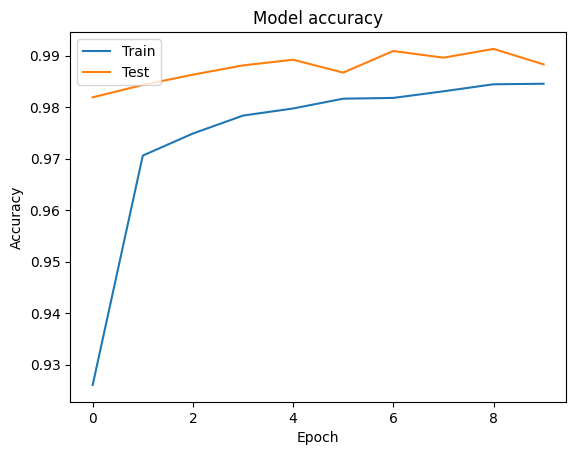

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Plot training & validation Loss values**

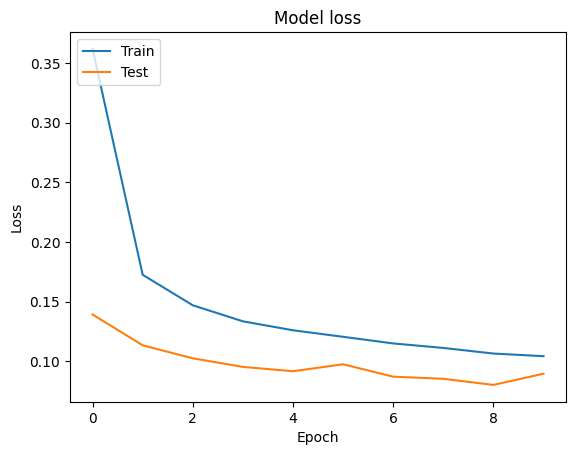

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Testing the Model with Custom Images

In [26]:
from PIL import Image


img = Image.open('img1.png').convert('L')
img = img.resize((28, 28))
img_array = np.array(img)
img_array = img_array / 255.0
img_array = np.reshape(img_array, (1, 28, 28, 1))


In [27]:
predictions = cnn.predict(img_array)

predicted_digit = np.argmax(predictions)
print(f'Predicted digit: {predicted_digit}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted digit: 3


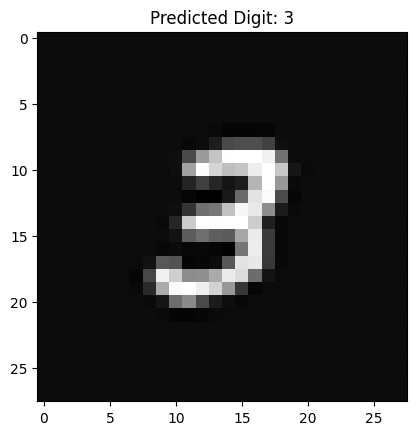

In [28]:
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()


In [29]:
cnn.save('mnist_cnn_model.h5')